In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv("/content/Parkinsson disease.csv")

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
sns.pairplot(data, hue = "status")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<ipython-input-7-bda7ed341d91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths = 0.1, cmap = "RdBu")


<Axes: >

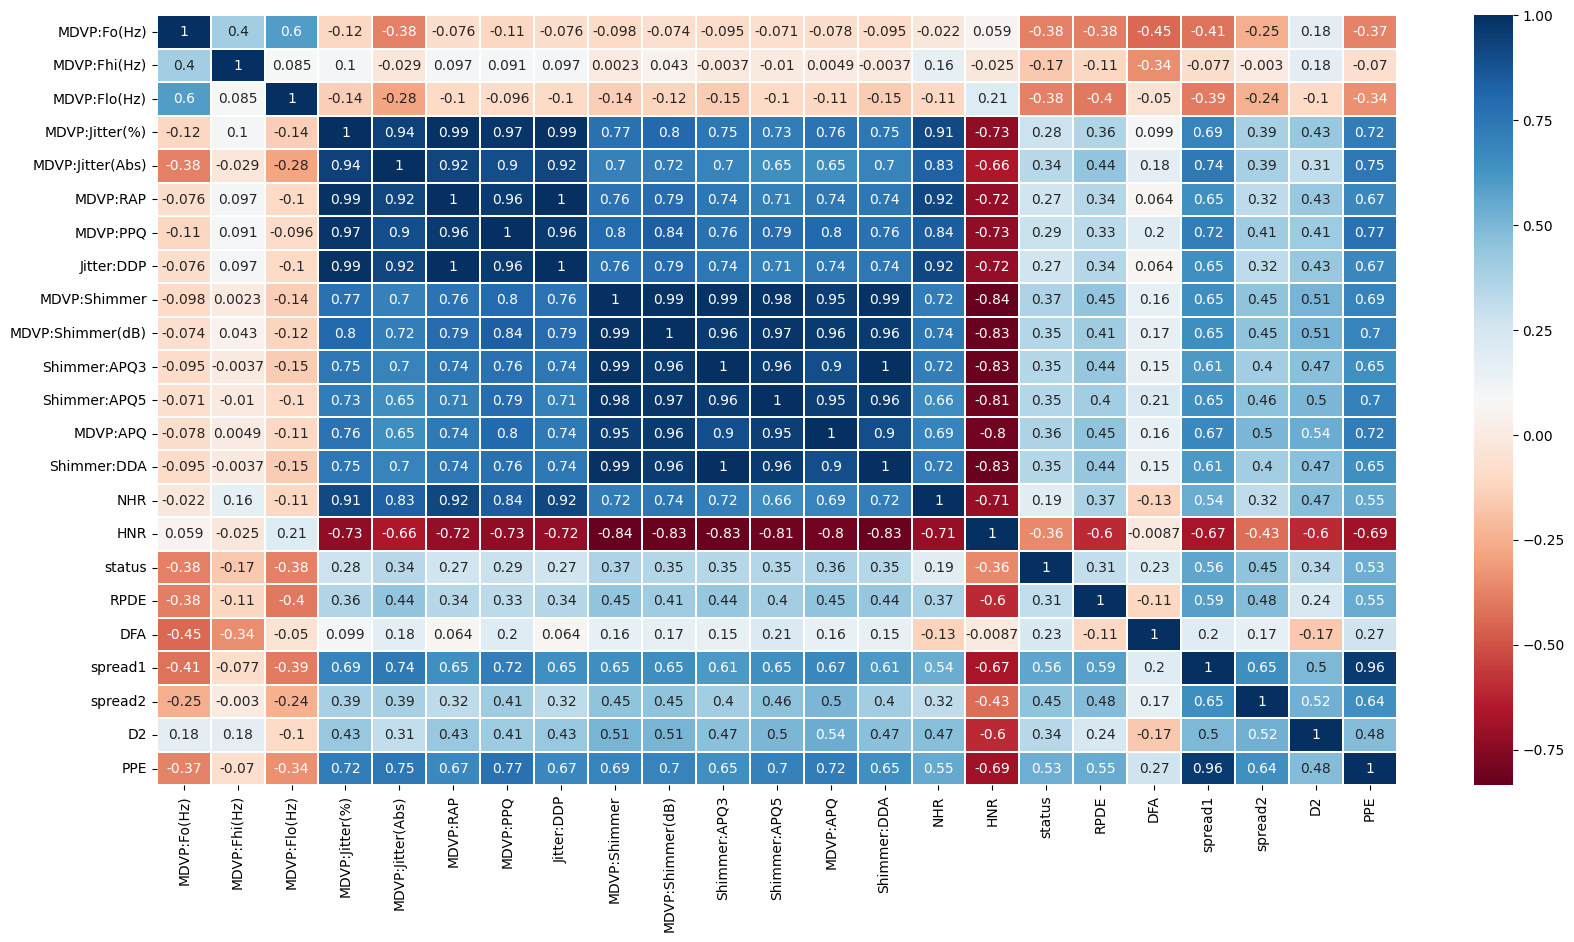

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, linewidths = 0.1, cmap = "RdBu")

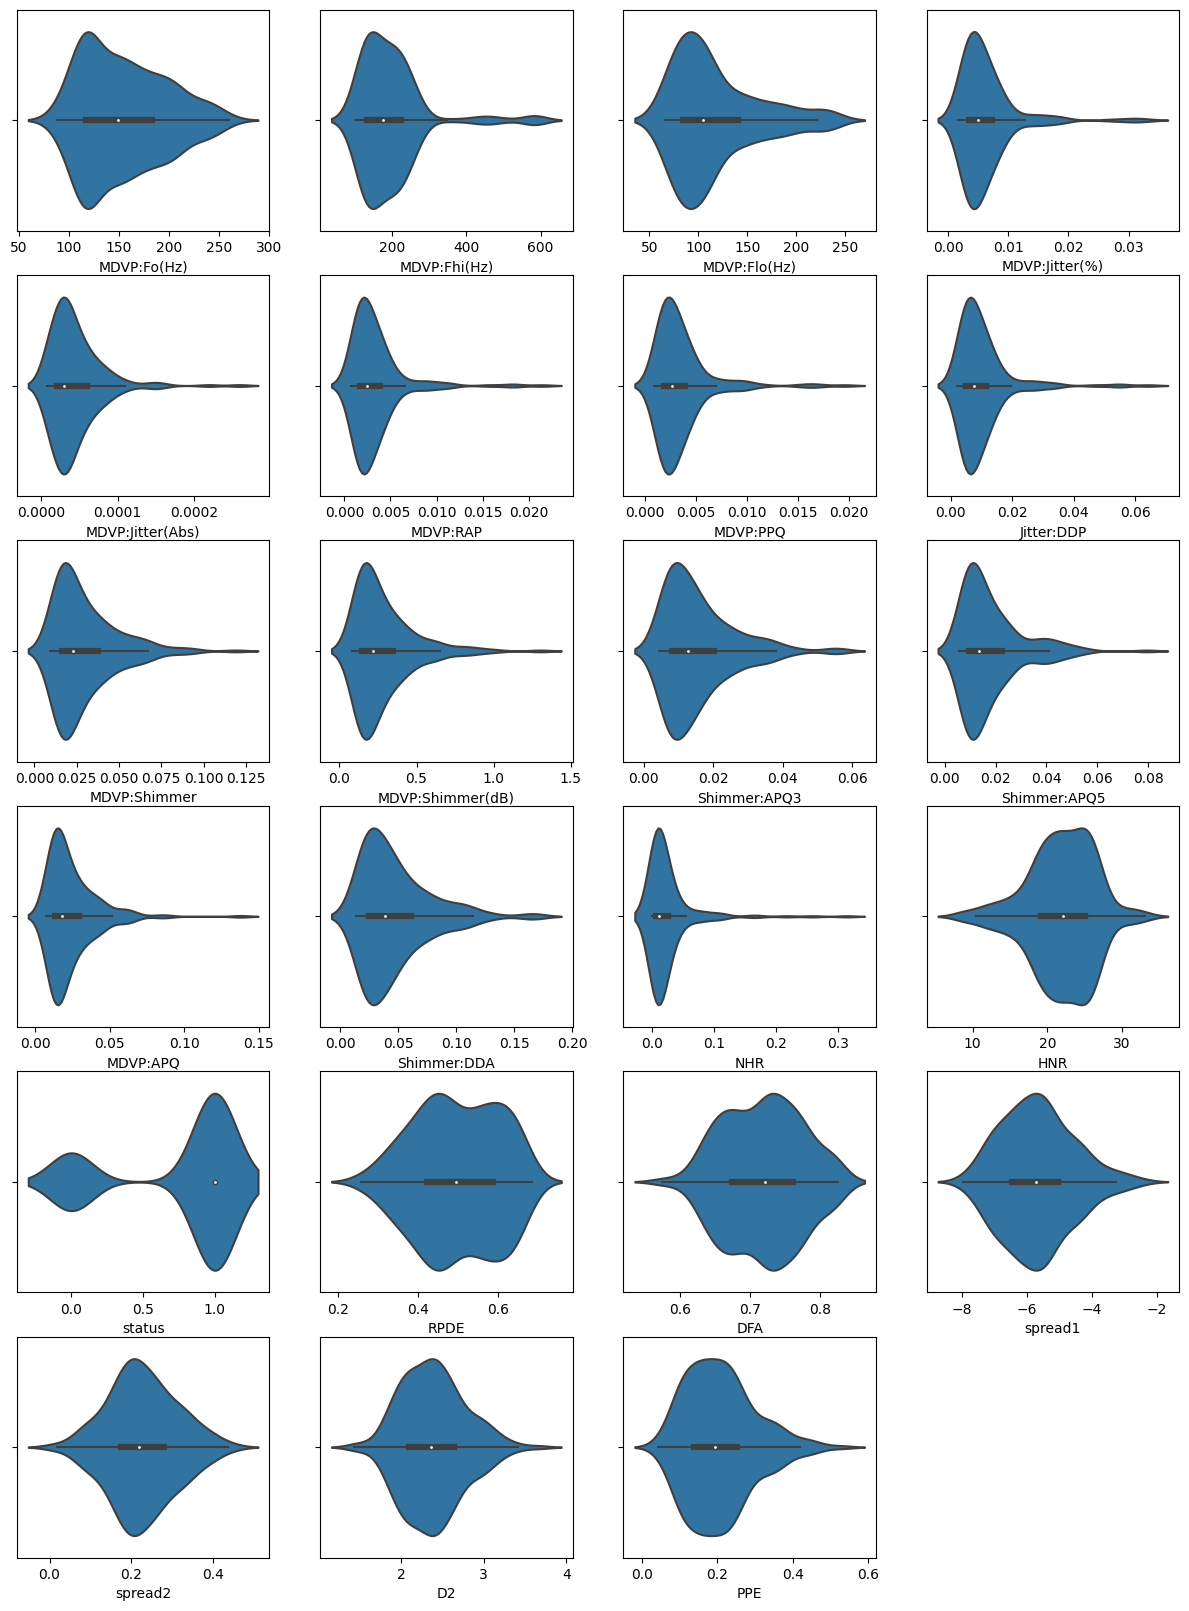

In [ ]:
plt.figure(figsize = (15, 27))
for i in range(1, 24, 1):
  plt.subplot(8, 4, i)
  sns.violinplot(data = data, x = data.iloc[:, i])

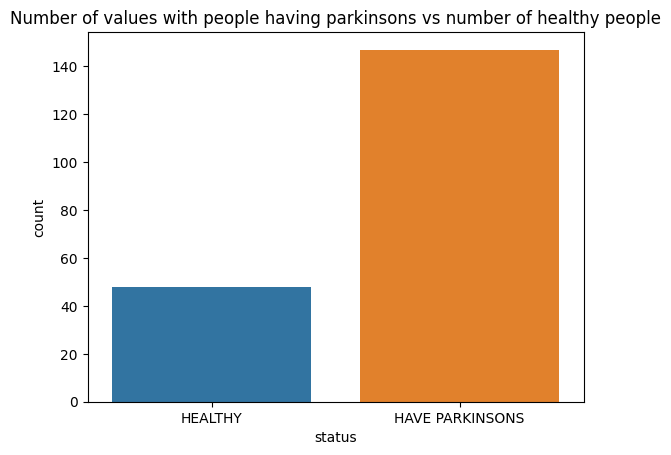

In [ ]:
sns.countplot(data = data, x = data.status)
plt.xticks(ticks = [0, 1], labels = ["HEALTHY", "HAVE PARKINSONS"])
plt.title("Number of values with people having parkinsons vs number of healthy people");

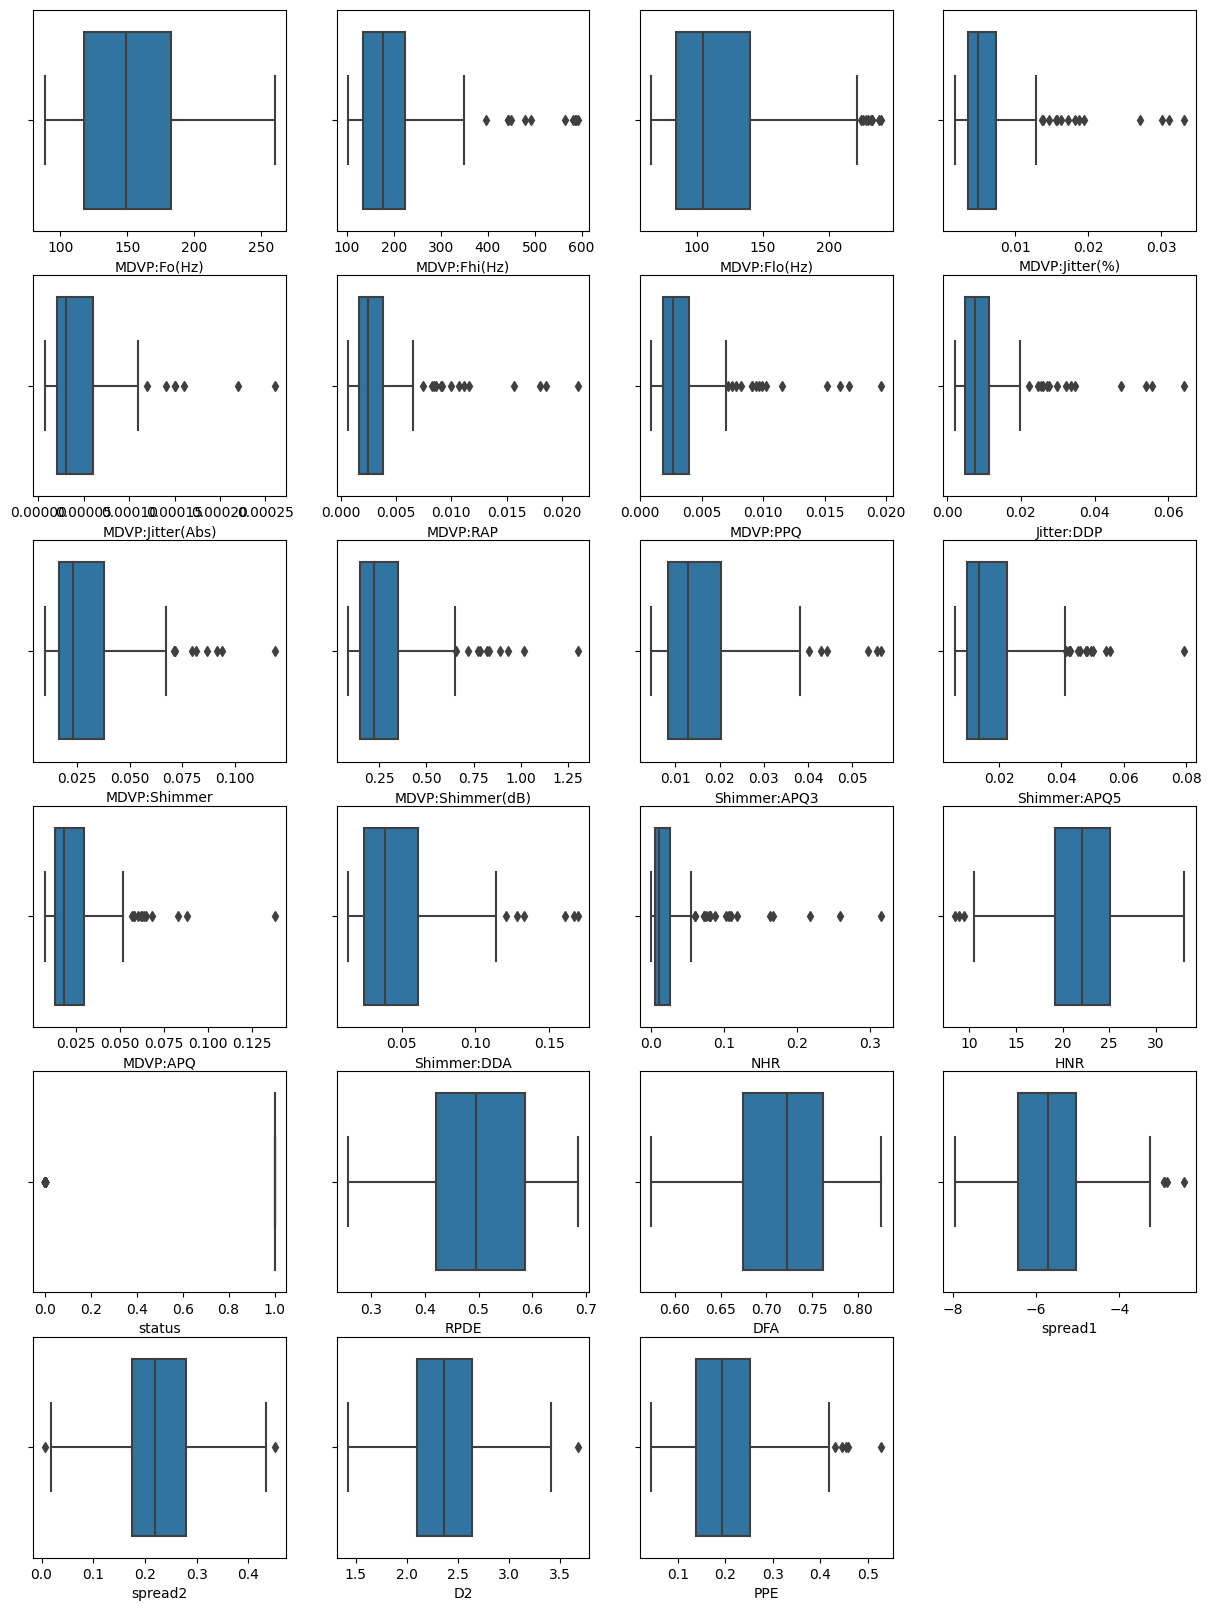

In [ ]:
plt.figure(figsize = (15, 27))
for i in range(1, 24, 1):
  plt.subplot(8, 4, i)
  sns.boxplot(data = data, x = data.iloc[:, i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
x = data.drop(labels = ["name", "status"], axis = 1)
y = data.status

In [ ]:
g = sns.PairGrid(x)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaled = MinMaxScaler()
scaled.fit(X_train)
X_train_scaled = scaled.transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [ ]:
tf.random.set_seed(42)

ann = Sequential([
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    # Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
ann.compile(loss = 'binary_crossentropy',
            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
            metrics = ["accuracy"])
ann.fit(X_train_scaled,
        y_train,
        epochs = 50,
        validation_data = (X_test_scaled, y_test))

Epoch 1/50
5/5 [==============================] - 2s 88ms/step - loss: 0.8289 - accuracy: 0.6603 - val_loss: 0.3898 - val_accuracy: 0.8205
Epoch 2/50
5/5 [==============================] - 0s 17ms/step - loss: 0.4202 - accuracy: 0.7756 - val_loss: 0.3594 - val_accuracy: 0.8718
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 0.3655 - accuracy: 0.8333 - val_loss: 0.3246 - val_accuracy: 0.8974
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.3582 - accuracy: 0.8526 - val_loss: 0.3239 - val_accuracy: 0.8974
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3588 - accuracy: 0.8462 - val_loss: 0.3126 - val_accuracy: 0.8974
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.3344 - accuracy: 0.8526 - val_loss: 0.3216 - val_accuracy: 0.8974
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.3168 - accuracy: 0.8782 - val_loss: 0.3454 - val_accuracy: 0.8718
Epoch 8/50
5/5 [===========

In [ ]:
print(ann.evaluate(X_test_scaled, y_test, verbose = 0)[1]*100)

94.87179517745972


In [ ]:
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}, cv = 5)

In [ ]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                         95]})

In [ ]:
KNN_clf = pd.DataFrame(clf.cv_results_)
KNN_clf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005556,0.008560,0.052874,0.077183,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.93750,0.870968,0.903226,0.903226,0.806452,0.884274,0.044237,1
1,0.003318,0.004086,0.010227,0.007320,euclidean,15,"{'metric': 'euclidean', 'n_neighbors': 15}",0.81250,0.806452,0.870968,0.903226,0.741935,0.827016,0.055878,6
2,0.001030,0.000108,0.006250,0.002925,euclidean,25,"{'metric': 'euclidean', 'n_neighbors': 25}",0.81250,0.806452,0.870968,0.870968,0.741935,0.820565,0.048016,8
3,0.002087,0.001826,0.011973,0.010178,euclidean,35,"{'metric': 'euclidean', 'n_neighbors': 35}",0.75000,0.774194,0.870968,0.806452,0.741935,0.788710,0.046858,11
4,0.001122,0.000210,0.006871,0.004920,euclidean,45,"{'metric': 'euclidean', 'n_neighbors': 45}",0.75000,0.806452,0.806452,0.774194,0.741935,0.775806,0.027181,15
5,0.001141,0.000157,0.005868,0.002257,euclidean,55,"{'metric': 'euclidean', 'n_neighbors': 55}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,18
6,0.001090,0.000100,0.013855,0.011133,euclidean,65,"{'metric': 'euclidean', 'n_neighbors': 65}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,18
7,0.001209,0.000213,0.040556,0.029099,euclidean,75,"{'metric': 'euclidean', 'n_neighbors': 75}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,18
8,0.001022,0.000165,0.003130,0.000140,euclidean,85,"{'metric': 'euclidean', 'n_neighbors': 85}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,18
9,0.000950,0.000055,0.004372,0.001857,euclidean,95,"{'metric': 'euclidean', 'n_neighbors': 95}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,18


Text(0.5, 1.0, 'Test_score vs Number of neighbors')

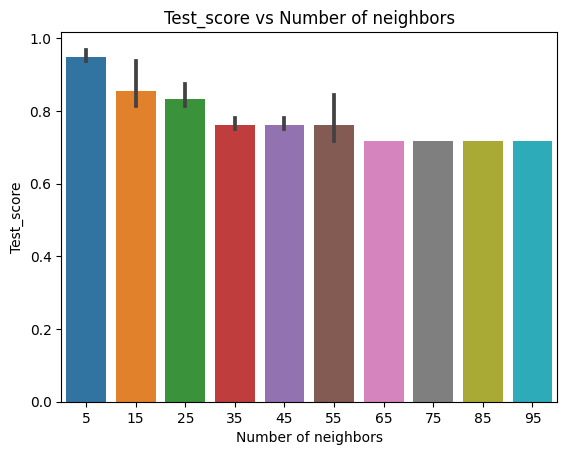

In [ ]:
sns.barplot(data= KNN_clf, y = KNN_clf.split0_test_score, x = KNN_clf.param_n_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Test_score")
plt.title("Test_score vs Number of neighbors")

In [ ]:
knn = Pipeline([
   ("preprocessing", MinMaxScaler()),
   ("clf", KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan'))
])
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('clf', KNeighborsClassifier(metric='manhattan'))])

In [ ]:
print(f"Knn: {knn.score(X_test, y_test)*100} %")

Knn: 94.87179487179486 %


In [ ]:
clf = GridSearchCV(RandomForestClassifier(),{
    'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
    'criterion': ['gini', 'entropy', 'log_loss']
}, cv = 5)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                          95]})

In [ ]:
RFC_clf = pd.DataFrame(clf.cv_results_)

RFC_clf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022264,0.007732,0.002495,0.000212,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.96875,0.935484,0.870968,0.903226,0.838710,0.903427,0.045906,21
1,0.044924,0.009438,0.003167,0.000235,gini,15,"{'criterion': 'gini', 'n_estimators': 15}",0.93750,0.935484,0.935484,0.967742,0.870968,0.929435,0.031699,1
2,0.074917,0.008067,0.004297,0.000361,gini,25,"{'criterion': 'gini', 'n_estimators': 25}",0.96875,0.870968,0.903226,0.903226,0.806452,0.890524,0.052712,26
3,0.072033,0.016183,0.005486,0.002559,gini,35,"{'criterion': 'gini', 'n_estimators': 35}",0.96875,0.935484,0.935484,0.903226,0.806452,0.909879,0.055711,12
4,0.072957,0.004923,0.003314,0.000056,gini,45,"{'criterion': 'gini', 'n_estimators': 45}",0.93750,0.838710,0.935484,0.935484,0.806452,0.890726,0.056572,25
5,0.087707,0.001913,0.004795,0.001041,gini,55,"{'criterion': 'gini', 'n_estimators': 55}",0.96875,0.935484,0.967742,0.935484,0.806452,0.922782,0.059983,2
6,0.102390,0.004636,0.004274,0.000053,gini,65,"{'criterion': 'gini', 'n_estimators': 65}",0.96875,0.903226,0.838710,0.935484,0.806452,0.890524,0.060091,26
7,0.120841,0.007272,0.004924,0.000121,gini,75,"{'criterion': 'gini', 'n_estimators': 75}",0.96875,0.935484,0.903226,0.903226,0.838710,0.909879,0.043070,12
8,0.129547,0.004490,0.005560,0.000394,gini,85,"{'criterion': 'gini', 'n_estimators': 85}",0.96875,0.903226,0.935484,0.935484,0.806452,0.909879,0.055711,12
9,0.149248,0.009047,0.005938,0.000321,gini,95,"{'criterion': 'gini', 'n_estimators': 95}",0.96875,0.903226,0.903226,0.935484,0.838710,0.909879,0.043070,12


Text(0.5, 1.0, 'Test_score vs Number of estimators')

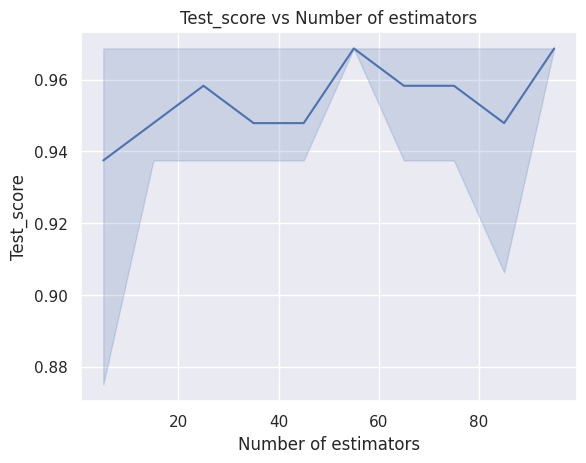

In [ ]:
sns.set_theme()
sns.lineplot(data= RFC_clf, y = RFC_clf.split0_test_score, x = RFC_clf.param_n_estimators)
plt.xlabel("Number of estimators")
plt.ylabel("Test_score")
plt.title("Test_score vs Number of estimators")

In [ ]:
for i in range(1, 101, 1):
  rfc = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("clf", RandomForestClassifier(n_estimators = i, criterion = "gini"))
  ])
  rfc.fit(X_train, y_train)
  print(i)
  if rfc.score(X_test, y_test) > 0.9487179487179487:
    break


1
2
3


In [ ]:
rfc_score = rfc.score(X_test, y_test)
rfc_score

0.9743589743589743

In [ ]:
rfc_n = Pipeline([
  ("preprocessing", MinMaxScaler()),
  ("clf", RandomForestClassifier(n_estimators = 3, criterion = "gini"))
])
rfc_n.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('clf', RandomForestClassifier(n_estimators=3))])

In [ ]:
nParam = rfc.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for the random forest classifier')

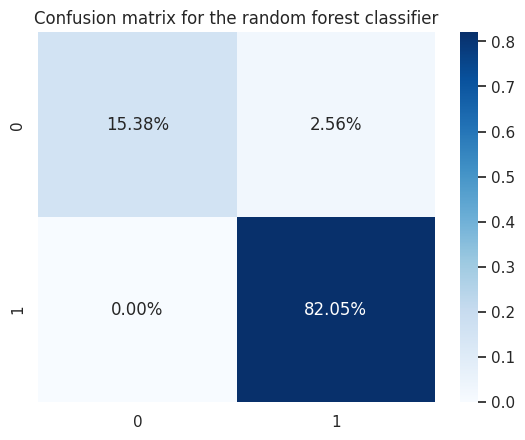

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = nParam)/np.sum(confusion_matrix(y_test, nParam)), fmt = "0.2%", annot = True, cmap = 'Blues')
plt.title("Confusion matrix for the random forest classifier")


In [ ]:
NPredict = knn.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for the K neighbor classifier')

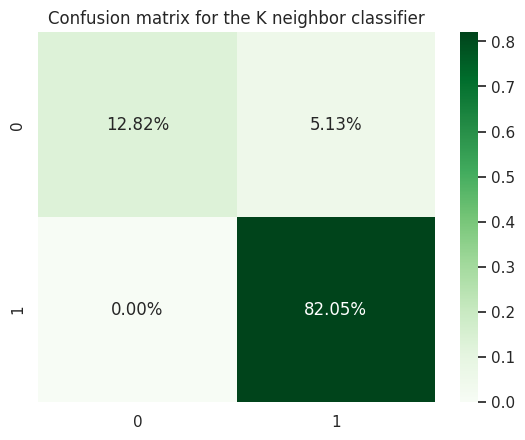

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = NPredict)/np.sum(confusion_matrix(y_test, NPredict)), fmt = "0.2%", annot = True, cmap = 'Greens')
plt.title("Confusion matrix for the K neighbor classifier")

In [ ]:
clf = GridSearchCV(SVC(),{
    'C': [0.25, 0.5, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}, cv = 5)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
SVC_clf = pd.DataFrame(clf.cv_results_)
SVC_clf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002278,0.000618,0.002056,0.001837,0.25,linear,"{'C': 0.25, 'kernel': 'linear'}",0.84375,0.870968,0.903226,0.870968,0.741935,0.846169,0.055418,14
1,0.001361,0.000071,0.000864,0.000116,0.25,poly,"{'C': 0.25, 'kernel': 'poly'}",0.87500,0.870968,0.903226,0.870968,0.774194,0.858871,0.044024,10
2,0.001494,0.000019,0.000876,0.000007,0.25,rbf,"{'C': 0.25, 'kernel': 'rbf'}",0.78125,0.806452,0.870968,0.870968,0.741935,0.814315,0.050622,15
3,0.001912,0.000093,0.000982,0.000128,0.25,sigmoid,"{'C': 0.25, 'kernel': 'sigmoid'}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,17
4,0.001318,0.000030,0.000780,0.000016,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.87500,0.870968,0.903226,0.870968,0.741935,0.852419,0.056544,12
5,0.001427,0.000134,0.000794,0.000022,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.90625,0.903226,0.935484,0.870968,0.774194,0.878024,0.055793,3
6,0.001472,0.000038,0.000861,0.000016,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.87500,0.870968,0.903226,0.870968,0.741935,0.852419,0.056544,12
7,0.001903,0.000096,0.000989,0.000117,0.5,sigmoid,"{'C': 0.5, 'kernel': 'sigmoid'}",0.71875,0.741935,0.741935,0.741935,0.741935,0.737298,0.009274,17
8,0.001297,0.000029,0.000771,0.000008,1,linear,"{'C': 1, 'kernel': 'linear'}",0.90625,0.903226,0.935484,0.870968,0.774194,0.878024,0.055793,3
9,0.001396,0.000060,0.000791,0.000017,1,poly,"{'C': 1, 'kernel': 'poly'}",0.90625,0.903226,0.967742,0.838710,0.709677,0.865121,0.087789,9


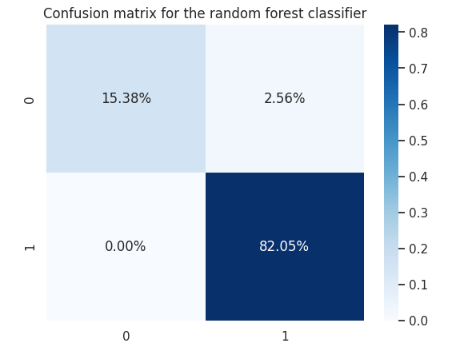

<Axes: >

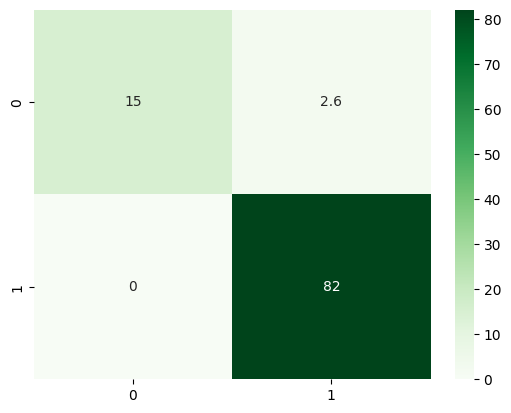

In [ ]:
sns.heatmap(np.array([[15.38 ,2.56], [0.00, 82.05]]),annot = True, cmap = "Greens")